To do word counts based estimates


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [208]:
df = pd.read_csv('data/09_01_2020_use_name_no_burg.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [283]:
train_df = df.iloc[train_idx, [3,2,0,1]]
bal_df = df.iloc[bal_idx, [3,2]]
valid_df = df.iloc[valid_idx, [3,2]]

In [284]:
train_df['label_final'] = np.where((((train_df['label'] == 'Burger') | (train_df['label2'] == 'Burger')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])
#train_df['label_final'] = np.where((((train_df['label'] == 'Kebab') | (train_df['label2'] == 'Kebab')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])
#train_df['label_final'] = np.where((((train_df['label'] == 'Pizza') | (train_df['label2'] == 'Pizza')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])
train_df['label_final'] = np.where((((train_df['label'] == 'Chicken') | (train_df['label2'] == 'Chicken')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])

In [285]:
labels = train_df.label_final.unique()
big_list = []
for label in labels:
    counts = Counter(_ for _ in " ".join((list(train_df.ascii_name_fix[train_df.label_final==label]))).split()).most_common(10000)
    big_list += [[word[0],label, word[1]] for word in counts]

In [286]:
big_list

[['and', 'Burger', 193],
 ['chicken', 'Burger', 142],
 ['pizza', 'Burger', 141],
 ['grill', 'Burger', 64],
 ['peri', 'Burger', 37],
 ['fried', 'Burger', 31],
 ['the', 'Burger', 30],
 ['burgers', 'Burger', 23],
 ['kebab', 'Burger', 22],
 ['food', 'Burger', 22],
 ['house', 'Burger', 17],
 ['kitchen', 'Burger', 16],
 ['takeaway', 'Burger', 14],
 ['bar', 'Burger', 14],
 ['fast', 'Burger', 14],
 ['express', 'Burger', 13],
 ['pizzeria', 'Burger', 13],
 ['hot', 'Burger', 10],
 ['gourmet', 'Burger', 9],
 ['munch', 'Burger', 9],
 ['big', 'Burger', 9],
 ['burger', 'Burger', 9],
 ['n', 'Burger', 8],
 ['rooster', 'Burger', 8],
 ['cafe', 'Burger', 7],
 ['-', 'Burger', 7],
 ['chick', 'Burger', 7],
 ['of', 'Burger', 7],
 ['king', 'Burger', 7],
 ['ribs', 'Burger', 6],
 ["'n'", 'Burger', 6],
 ['urban', 'Burger', 6],
 ['tasty', 'Burger', 6],
 ['restaurant', 'Burger', 6],
 ['hut', 'Burger', 6],
 ['piri', 'Burger', 6],
 ['slice', 'Burger', 6],
 ['kebabs', 'Burger', 5],
 ['fry', 'Burger', 5],
 ['diner', 'B

In [287]:
df2 = pd.DataFrame.from_records(big_list, columns=['word', 'label', 'count'])
df2 = df2[df2.label != 'Fast Food']

In [288]:
to_drop = ['the', 'and', 'of', 'restaurant', 'takeaway']
for word in to_drop:
    df2 = df2[df2['word'] != word]

to_drop = ['kebab', 'pizza', 'chicken', 'burger', 'kebabs', 'pizzas', 'burgers']
for word in to_drop:
    df2 = df2[df2['word'] != word]

    
df2.reset_index(inplace = True, drop = True)
    
df2.loc[len(df2)] = ['kebab', 'Kebab', 500]
df2.loc[len(df2)] = ['kebabs', 'Kebab', 500]
df2.loc[len(df2)] = ['pizza', 'Pizza', 500]
df2.loc[len(df2)] = ['pizzas', 'Pizza', 500]
df2.loc[len(df2)] = ['chicken', 'Chicken', 500]
df2.loc[len(df2)] = ['burger', 'Burger', 500]
df2.loc[len(df2)] = ['burgers', 'Burger', 500]

In [289]:
df2

,word,label,count
0,grill,Burger,64
1,peri,Burger,37
2,fried,Burger,31
3,food,Burger,22
4,house,Burger,17
5,kitchen,Burger,16
6,bar,Burger,14
7,fast,Burger,14
8,express,Burger,13
9,pizzeria,Burger,13


In [290]:
#df3=pd.DataFrame(pd.pivot_table(df2, values='count', index='word', columns='label', aggfunc='count', fill_value=0).to_records())
df3=pd.DataFrame(pd.pivot_table(df2, values='count', index='word', columns='label', aggfunc='sum', fill_value=0).to_records())

In [291]:
df3[df3['word']=='burger']

,word,Burger,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sand/Caf/Bake
1137,burger,500,0,0,0,0,0,0,0,0


In [292]:
df3[df3['word']=='kebab']

,word,Burger,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sand/Caf/Bake
3581,kebab,0,0,0,0,0,0,500,0,0


In [293]:
my_dict = df3.set_index('word').T.to_dict('list')

In [319]:
fast_foods = ['Pizza', 'Burger', 'Kebab', 'Chicken']
my_cols = df3.columns[1:]
len_labels = len(my_cols)
final_list =[]
for name in valid_df.ascii_name_fix:
    little_list = np.zeros(len_labels)
    for item in name.split():
        if item in my_dict:
            little_list = np.array(my_dict[item]) + little_list
    if not np.any(little_list):
        final_list.append(random.choice(my_cols))
        #final_list.append('Other')
    else:
        #final_list.append(little_list)
        max_cat = little_list.max()
        temp_list = [1 if x > 0.25 else 0 for x in little_list/max_cat]
        ff_check = list(my_cols[[x==1 for x in temp_list]])
        if sum(el in ff_check for el in fast_foods) > 1:
            final_list.append('Fast Food')
        else:
            final_list.append(my_cols[little_list.argmax()])
        

In [355]:
my_cols_no_burg = list(my_cols)

In [356]:
my_cols_no_burg.remove('Burger')

In [358]:
final_list = [random.choice(my_cols_no_burg) if x == 'Burger' else x for x in final_list]

In [359]:
final_list

['Kebab',
 'Pizza',
 'Fast Food',
 'Kebab',
 'Indian',
 'Kebab',
 'Fast Food',
 'Fast Food',
 'Sand/Caf/Bake',
 'Indian',
 'Sand/Caf/Bake',
 'Kebab',
 'Fish & Chips',
 'Fast Food',
 'Fast Food',
 'Indian',
 'Chicken',
 'Indian',
 'Fish & Chips',
 'Fast Food',
 'Pizza',
 'Fast Food',
 'Chinese',
 'Fish & Chips',
 'Pizza',
 'Pizza',
 'Chinese',
 'Fish & Chips',
 'Fish & Chips',
 'Sand/Caf/Bake',
 'Pizza',
 'Fast Food',
 'Indian',
 'Indian',
 'Pizza',
 'Kebab',
 'Indian',
 'Chinese',
 'Fast Food',
 'Kebab',
 'Chicken',
 'Indian',
 'Pizza',
 'Chinese',
 'Fish & Chips',
 'Kebab',
 'Sand/Caf/Bake',
 'Fish & Chips',
 'Pizza',
 'Sand/Caf/Bake',
 'Pizza',
 'Fast Food',
 'Chinese',
 'Indian',
 'Pizza',
 'Pizza',
 'Sand/Caf/Bake',
 'Indian',
 'Pizza',
 'Indian',
 'Fast Food',
 'Pizza',
 'Fish & Chips',
 'Kebab',
 'Fish & Chips',
 'Pizza',
 'Pizza',
 'Fish & Chips',
 'Fish & Chips',
 'Sand/Caf/Bake',
 'Fish & Chips',
 'Fast Food',
 'Sand/Caf/Bake',
 'Desserts',
 'Kebab',
 'Indian',
 'Fish & Chips'

In [360]:
Counter(final_list).most_common()

[('Fast Food', 649),
 ('Indian', 570),
 ('Pizza', 454),
 ('Fish & Chips', 445),
 ('Chinese', 444),
 ('Kebab', 287),
 ('Sand/Caf/Bake', 264),
 ('Chicken', 250),
 ('Desserts', 237)]

In [361]:
valid_df['predict'] = final_list
valid_df['ind'] = valid_df['label_final'] == valid_df['predict']
results = valid_df.groupby(['label_final'])['ind'].agg(sum).reset_index()
sum(results['ind']/400)/9

0.6147222222222222

In [362]:
results

,label_final,ind
0,Chicken,208.0
1,Chinese,283.0
2,Desserts,183.0
3,Fast Food,225.0
4,Fish & Chips,293.0
5,Indian,306.0
6,Kebab,237.0
7,Pizza,306.0
8,Sand/Caf/Bake,172.0


In [23]:
from sklearn.metrics import confusion_matrix

In [363]:
df_confusion = confusion_matrix(valid_df['label_final'], valid_df['predict'], labels = results['label_final'])
#df_confusion = pd.crosstab(valid_df['label'], valid_df['predict'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [27]:
    def plot_confusion_matrix(df_confusion, classes, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = df_confusion
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

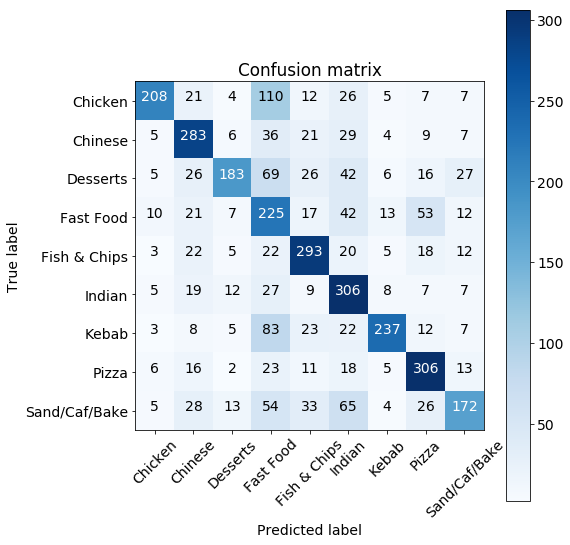

In [370]:
plt.rcParams.update({'font.size': 14})
plot_confusion_matrix(df_confusion, classes = results['label_final'], figsize=(8,8))

In [365]:
#Precision = tp / tp + fp
recall = np.diag(df_confusion) / np.sum(df_confusion, axis = 1)
precision = np.diag(df_confusion) / np.sum(df_confusion, axis = 0)

In [366]:
recall

array([0.52  , 0.7075, 0.4575, 0.5625, 0.7325, 0.765 , 0.5925, 0.765 , 0.43  ])

In [367]:
precision

array([0.832   , 0.637387, 0.772152, 0.346687, 0.658427, 0.536842, 0.825784, 0.674009, 0.651515])

In [368]:
recall.mean()

0.6147222222222222

In [369]:
precision.mean()

0.6594226114426802